we will focus on providing a basic recommendation system by suggesting moveies that are most similar to a particular movie.

- Understand the dataset
- calculate average rating
- calculate how many users have rated a movie
- plot using histograms
- make a table in which for each movie how much each user has given the rating
- find the correlation coefficient between two movies
- recommend top 10 movies based on the correlation values

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Get Data

column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [39]:
df["item_id"].value_counts().head()

item_id
50     583
258    509
100    508
181    507
294    485
Name: count, dtype: int64

In [4]:
movie_titles = pd.read_csv("ml-100k/u.item", sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['item_id', 'title'])
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
movie_titles[movie_titles["item_id"] == 242]

,item_id,title
241,242,Kolya (1996)


In [6]:
df = pd.merge(df,movie_titles,on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)


# Visualization Imports

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [8]:
# use groupby to get average rating for each movie/item
g = df.groupby("title")
g['rating'].mean().sort_values(ascending=False)

title
Aiqing wansui (1994)                                 5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Santa with Muscles (1996)                            5.0
Prefontaine (1997)                                   5.0
They Made Me a Criminal (1939)                       5.0
                                                    ... 
Pharaoh's Army (1995)                                1.0
August (1996)                                        1.0
Babyfever (1994)                                     1.0
Amityville: A New Generation (1993)                  1.0
Woman in Question, The (1950)                        1.0
Name: rating, Length: 1664, dtype: float64

In [9]:
# use groupby to get count of ratings for each movie/item
g['rating'].count().sort_values(ascending=False).head(10)

title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [10]:
# Group by movie title and calculate average rating and rating count
movie_stats = df.groupby("item_id")['rating'].agg(['mean', 'count']).reset_index()

# Rename columns for clarity
movie_stats.columns = ['item_id', 'average_rating', 'rating_count']

# Display the result
print(movie_stats.head())


   item_id  average_rating  rating_count
0        1        3.878319           452
1        2        3.206107           131
2        3        3.033333            90
3        4        3.550239           209
4        5        3.302326            86


In [11]:
pd.merge(movie_stats,movie_titles,on='item_id')

,item_id,average_rating,rating_count,title
0,1,3.878319,452,Toy Story (1995)
1,2,3.206107,131,GoldenEye (1995)
2,3,3.033333,90,Four Rooms (1995)
3,4,3.550239,209,Get Shorty (1995)
4,5,3.302326,86,Copycat (1995)
...,...,...,...,...
1677,1678,1.000000,1,Mat' i syn (1997)
1678,1679,3.000000,1,B. Monkey (1998)
1679,1680,2.000000,1,Sliding Doors (1998)
1680,1681,3.000000,1,You So Crazy (1994)


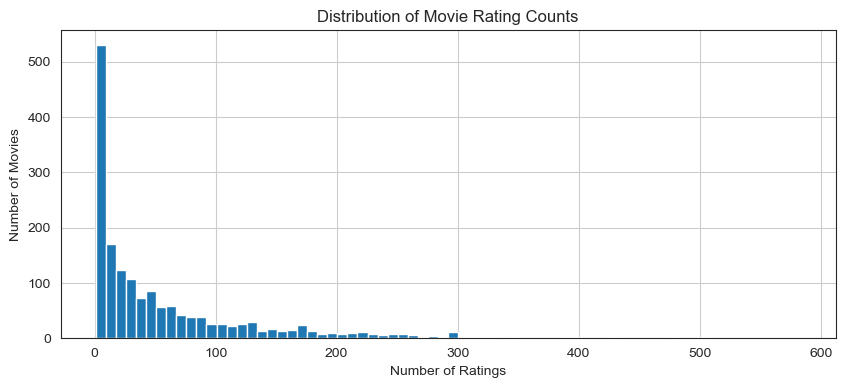

In [12]:
plt.figure(figsize=(10,4))
movie_stats['rating_count'].hist(bins=70)
plt.title('Distribution of Movie Rating Counts')
plt.xlabel('Number of Ratings') 
plt.ylabel('Number of Movies')
plt.show()  

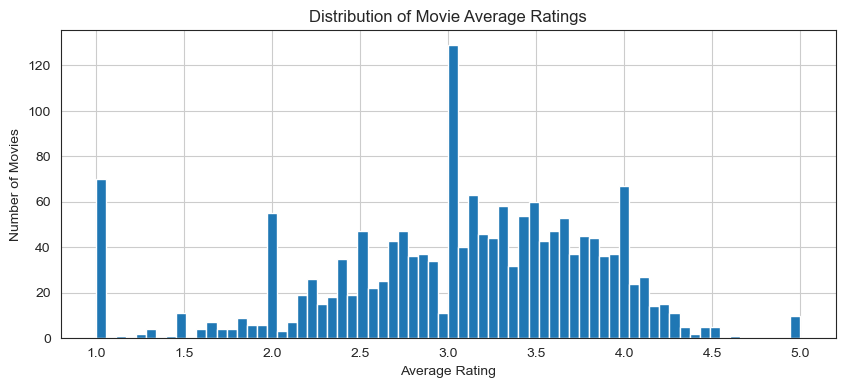

In [13]:
plt.figure(figsize=(10,4))
movie_stats['average_rating'].hist(bins=70)
plt.title('Distribution of Movie Average Ratings')
plt.xlabel('Average Rating')    
plt.ylabel('Number of Movies')
plt.show() 

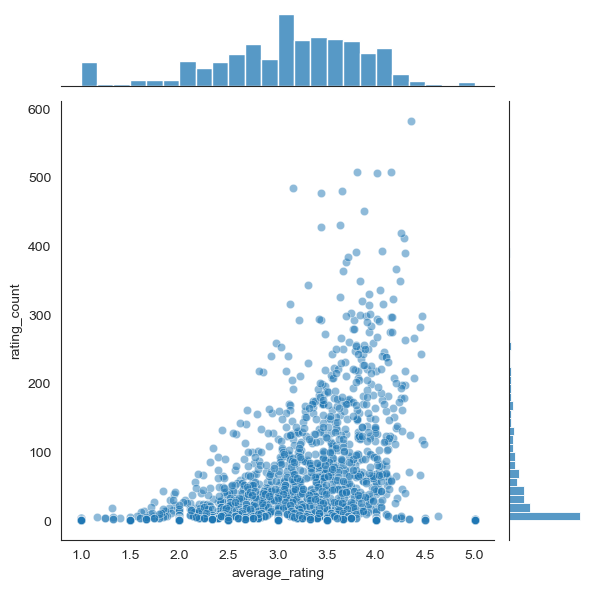

In [14]:
sns.jointplot(x='average_rating',y='rating_count',data=movie_stats,alpha=0.5)
plt.show()

In [18]:
y_matrix = df.pivot_table(index='item_id',columns='user_id',values='rating')
y_matrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# keep items with at least 30 ratings
y_matrix.loc[movie_stats[movie_stats['rating_count'] >= 30]['item_id']]

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
1226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [27]:
y_matrix.dropna(thresh=30,inplace=True)
y_matrix

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
1226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0


In [28]:
# find the correlation between movies
corr_matrix = y_matrix.T.corr(method='pearson')
corr_matrix

item_id,1,2,3,4,5,7,8,9,10,11,...,1197,1210,1215,1217,1220,1221,1226,1228,1244,1267
item_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.221784,0.175794,0.103135,0.386475,0.159248,0.247367,0.090176,1.875015e-01,3.104538e-01,...,0.357426,0.132209,0.317916,2.916360e-01,0.495766,0.104051,0.324138,1.643723e-01,4.211754e-01,0.192135
2,0.221784,1.000000,0.230536,0.244556,0.217559,0.175445,0.340525,-0.227599,1.990826e-01,3.099145e-01,...,-0.039528,0.379996,0.402098,4.065799e-01,0.096504,0.491236,0.381000,4.012777e-01,1.195229e-01,0.480966
3,0.175794,0.230536,1.000000,-0.201969,0.184612,0.071509,-0.118587,0.016742,7.156282e-02,1.729811e-01,...,-0.055989,-0.056376,0.419385,-7.949132e-17,0.626653,-0.065653,0.214176,3.748191e-01,0.000000e+00,0.242536
4,0.103135,0.244556,-0.201969,1.000000,-0.237350,0.152733,0.281270,0.208459,2.319308e-01,2.017818e-01,...,0.289719,0.144586,0.149873,8.684110e-02,-0.312220,0.267261,0.007037,8.382595e-02,-9.349470e-03,0.042415
5,0.386475,0.217559,0.184612,-0.237350,1.000000,0.180211,0.205114,0.065169,-8.436615e-01,3.183311e-01,...,0.399012,0.583580,-0.167046,1.426055e-01,0.732345,0.266996,-0.645497,1.007429e-01,5.761103e-01,0.283431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,0.104051,0.491236,-0.065653,0.267261,0.266996,0.428791,0.454668,0.293533,-6.080942e-17,2.686162e-01,...,NaN,0.710047,NaN,7.143996e-01,0.544415,1.000000,0.333333,6.868028e-01,1.000000e+00,0.734968
1226,0.324138,0.381000,0.214176,0.007037,-0.645497,0.621482,0.284356,0.539325,-1.023234e-01,4.797373e-01,...,-0.218218,NaN,NaN,6.019293e-02,0.550350,0.333333,1.000000,8.660254e-01,NaN,0.577350
1228,0.164372,0.401278,0.374819,0.083826,0.100743,0.180514,0.396600,-0.263283,-3.442655e-17,8.827692e-03,...,NaN,0.106222,0.545545,4.767954e-01,0.027116,0.686803,0.866025,1.000000e+00,-2.532696e-16,0.158114


In [34]:
movie_id = 0
top_ten = corr_matrix.iloc[movie_id,:].sort_values(ascending=False).head(10)
recommend_movie_id = top_ten.index
correlation_score = top_ten.values
movie_titles[movie_titles['item_id'].isin(recommend_movie_id)]

,item_id,title
0,1,Toy Story (1995)
329,330,187 (1997)
349,350,Fallen (1998)
425,426,"Transformers: The Movie, The (1986)"
538,539,Mouse Hunt (1997)
645,646,Once Upon a Time in the West (1969)
818,819,Eddie (1996)
920,921,Farewell My Concubine (1993)
922,923,Raise the Red Lantern (1991)
1050,1051,"Associate, The (1996)"


In [35]:
movie_id = 426
top_ten = corr_matrix.iloc[movie_id,:].sort_values(ascending=False).head(10)
recommend_movie_id = top_ten.index
correlation_score = top_ten.values
movie_titles[movie_titles['item_id'].isin(recommend_movie_id)]

,item_id,title
405,406,Thinner (1996)
546,547,"Young Poisoner's Handbook, The (1995)"
823,824,"Great White Hype, The (1996)"
874,875,She's So Lovely (1997)
974,975,Fear (1996)
989,990,Anna Karenina (1997)
994,995,"Kiss Me, Guido (1997)"
1018,1019,"Die xue shuang xiong (Killer, The) (1989)"
1024,1025,Fire Down Below (1997)
1193,1194,Once Were Warriors (1994)


In [41]:
movie_id = 50
print(movie_titles[movie_titles['item_id'] == movie_id])
# Get top ten correlated movies for the given movie_id
top_ten = corr_matrix.iloc[movie_id, :].sort_values(ascending=False).head(10)
recommend_movie_id = top_ten.index
correlation_score = top_ten.values

# Prepare DataFrame with movie_id, correlation, and count of ratings
top_movies = (
    pd.DataFrame({
        'item_id': recommend_movie_id,
        'correlation': correlation_score
    })
    .merge(movie_titles, on='item_id')
    .merge(movie_stats[['item_id', 'rating_count']], on='item_id')
    .sort_values('correlation', ascending=False)
    .reset_index(drop=True)
)

top_movies

    item_id             title
49       50  Star Wars (1977)


,item_id,correlation,title,rating_count
0,58,1.000000,Quiz Show (1994),175
1,1018,0.889039,Tie Me Up! Tie Me Down! (1990),32
2,308,0.785714,FairyTale: A True Story (1997),30
3,1059,0.745356,Don't Be a Menace to South Central While Drink...,35
4,641,0.677725,Paths of Glory (1957),33
5,712,0.677557,Tin Men (1987),51
6,670,0.674033,Body Snatchers (1993),36
7,1022,0.665133,"Fast, Cheap & Out of Control (1997)",32
8,855,0.653815,Diva (1981),66
9,674,0.622212,Cat People (1982),48


      item_id                           title
1017     1018  Tie Me Up! Tie Me Down! (1990)


In [36]:
correlation_score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Recommend using cosine similarity between the items

In [49]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between items (movies)
# Fill NaN with 0 for cosine similarity calculation
item_cosine_sim = cosine_similarity(y_matrix.fillna(0))

# item_cosine_sim is a numpy array where item_cosine_sim[i, j] is the cosine similarity between item i and item j
item_cosine_sim_df = pd.DataFrame(item_cosine_sim)
item_cosine_sim_df.head()

,0,1,2,3,4,5,6,7,8,9,...,796,797,798,799,800,801,802,803,804,805
0,1.000000,0.402382,0.330245,0.454938,0.286714,0.620979,0.481114,0.496288,0.273935,0.468291,...,0.233947,0.226516,0.213342,0.218311,0.208601,0.221123,0.186003,0.235314,0.219754,0.177867
1,0.402382,1.000000,0.273069,0.502571,0.318836,0.383403,0.337002,0.255252,0.171082,0.468506,...,0.124874,0.301858,0.293376,0.367710,0.245625,0.226789,0.127862,0.520666,0.220371,0.265758
2,0.330245,0.273069,1.000000,0.324866,0.212957,0.372921,0.200794,0.273669,0.158104,0.361165,...,0.110922,0.221969,0.270185,0.236706,0.312246,0.086884,0.169731,0.233301,0.137205,0.309042
3,0.454938,0.502571,0.324866,1.000000,0.334239,0.489283,0.490236,0.419044,0.252561,0.588337,...,0.173787,0.305708,0.209783,0.290346,0.262536,0.258782,0.188084,0.340659,0.183357,0.299244
4,0.286714,0.318836,0.212957,0.334239,1.000000,0.334769,0.259161,0.272448,0.055453,0.375809,...,0.138693,0.358062,0.214982,0.354275,0.311779,0.217470,0.060897,0.209954,0.285682,0.263850


In [50]:
movie_id = 50
print(movie_titles[movie_titles['item_id'] == movie_id])
# Get top ten correlated movies for the given movie_id
top_ten = item_cosine_sim_df.iloc[movie_id, :].sort_values(ascending=False).head(10)
recommend_movie_id = top_ten.index
correlation_score = top_ten.values

# Prepare DataFrame with movie_id, correlation, and count of ratings
top_movies = (
    pd.DataFrame({
        'item_id': recommend_movie_id,
        'correlation': correlation_score
    })
    .merge(movie_titles, on='item_id')
    .merge(movie_stats[['item_id', 'rating_count']], on='item_id')
    .sort_values('correlation', ascending=False)
    .reset_index(drop=True)
)

top_movies

    item_id             title
49       50  Star Wars (1977)


,item_id,correlation,title,rating_count
0,50,1.000000,Star Wars (1977),583
1,368,0.604541,Bio-Dome (1996),31
2,61,0.599801,Three Colors: White (1994),59
3,56,0.592903,Pulp Fiction (1994),394
4,605,0.579961,Meet Me in St. Louis (1944),31
5,288,0.578898,Scream (1996),478
6,175,0.578578,Brazil (1985),208
7,194,0.570801,"Sting, The (1973)",241
8,25,0.568710,"Birdcage, The (1996)",293
9,183,0.566076,Alien (1979),291
